<a href="https://colab.research.google.com/github/Int-Group-44/flowers-102/blob/main/OxfordFlowers102CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

dataset, dataset_info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
dataset_info
test_set, training_set, validation_set = dataset['test'], dataset['train'], dataset['validation']

In [11]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

print(gpus)

Physical devices cannot be modified after being initialized
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Importing TensorFlow 

In [12]:
num_classes = dataset_info.features['label'].num_classes
num_training_examples = 1020
num_validation_examples = 1020

In [13]:
IMAGE_RES = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
    #label = tf.one_hot(label, depth=num_classes)
    return image, label
BATCH_SIZE = 32
train_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_set.shuffle(num_validation_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
test_batches = test_set.map(format_image).batch(BATCH_SIZE).prefetch(1)


In [28]:
def make_model(input_shape, num_classes):
  model = tf.keras.Sequential()
  model.add(layers.RandomFlip("horizontal", input_shape=input_shape))
  model.add(layers.RandomRotation(20))
  model.add(layers.RandomZoom(0.2))
  #model.add(layers.RandomContrast(factor=(0.0, 0.1)))
  model.add(layers.Conv2D(64, 3, padding='same', activation='relu')) #64 filters, kernel size 3x3, stride = 1
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, 3, padding='same', activation='relu')) 
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())                                   #2x2 pooling, stride of 2
  model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(512, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(512, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(512, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(512, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(512, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(512, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(1024, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(1024, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(1024, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())
  model.add(layers.Flatten())
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.35))
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.35))
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.35))
  model.add(layers.Dense(num_classes))
  return model


In [29]:
tf.keras.backend.clear_session()

In [ ]:
model = make_model(input_shape=(IMAGE_RES, IMAGE_RES) + (3,), num_classes=102)
#keras.utils.plot_model(model, show_shapes=True)

epochs = 50

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001)

model.compile(
    optimizer=tf.keras.optimizers.SGD(momentum=0.9),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

history = model.fit(
    train_batches,
    epochs=epochs,
    validation_data=validation_batches,
    batch_size=BATCH_SIZE,
    validation_batch_size=BATCH_SIZE,
    verbose=1,
    callbacks=[reduce_lr]
)

Epoch 1/50
32/32 [==============================] - 30s 767ms/step - loss: 5.9611 - accuracy: 0.0196 - val_loss: 2022260864.0000 - val_accuracy: 0.0098 - lr: 0.0100
Epoch 2/50
32/32 [==============================] - 29s 911ms/step - loss: 5.8272 - accuracy: 0.0245 - val_loss: 2765230.2500 - val_accuracy: 0.0098 - lr: 0.0100
Epoch 3/50
32/32 [==============================] - 23s 726ms/step - loss: 5.6942 - accuracy: 0.0265 - val_loss: 66812.5625 - val_accuracy: 0.0098 - lr: 0.0100
Epoch 4/50
32/32 [==============================] - 24s 749ms/step - loss: 5.6870 - accuracy: 0.0294 - val_loss: 4069.0354 - val_accuracy: 0.0098 - lr: 0.0100
Epoch 5/50
32/32 [==============================] - 29s 894ms/step - loss: 5.1872 - accuracy: 0.0480 - val_loss: 545.4583 - val_accuracy: 0.0098 - lr: 0.0100
Epoch 6/50
32/32 [==============================] - 24s 737ms/step - loss: 5.3897 - accuracy: 0.0500 - val_loss: 106.3013 - val_accuracy: 0.0108 - lr: 0.0100
Epoch 7/50
32/32 [====================

In [ ]:
model.save('OxfordFlowers102-2.keras')

In [18]:
test_loss, test_acc = model.evaluate(test_batches, verbose=1, batch_size=BATCH_SIZE)
print("Test accuracy:", test_acc)

193/193 [==============================] - 28s 146ms/step - loss: 3.4159 - accuracy: 0.2721
Test accuracy: 0.2720767557621002


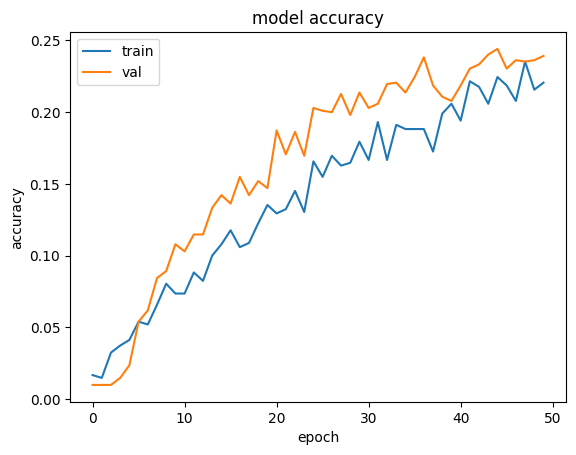

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc="upper left")
plt.show()